In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
file = 'Resources/crypto_data.csv'
crypto_file = pd.read_csv(file, index_col = 0)
crypto_file

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [15]:
# Discard all cryptocurrencies that are not being traded
# Step 1 - Check the values
print(crypto_file['IsTrading'].value_counts())
# Step 2 - Kill the False values
trading_crypto = crypto_file[crypto_file['IsTrading']!=False]
trading_crypto

True     1144
False     108
Name: IsTrading, dtype: int64


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [17]:
# Drop the IsTrading column from the dataframe
crypto2 = trading_crypto.drop(columns = ['IsTrading'])
crypto2

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [20]:
#Remove all rows that have at least one null value.
crypto3 = crypto2.dropna()
crypto3

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [30]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
zero_check = crypto3[crypto3['TotalCoinsMined']<=0.0]
print(len(zero_check))

crypto4 = crypto3[crypto3['TotalCoinsMined']>0.0]
crypto4

153


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [32]:
# delete the CoinName from the original dataframe.
crypto5 = crypto4.drop(columns = ['CoinName'])
crypto5

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [110]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data
#gonna scrub the Proof Type a bit
# combining some options based on research https://www.cryptokosh.com/understanding-different-proofs-of-crypto-consensus/ \
# and the delineations aren't worth the skewed results given the ones I will combine
crypto6=crypto5.replace({"PoS/PoW ":"PoW/PoS","PoS/PoW":"PoW/PoS","PoW and PoS":"PoW/PoS",\
                         "PoW/PoW":"PoW","Pos":"PoS","Proof of Authority":"Other","DPOS":"DPoS",\
                        "PoW/nPoS":"PoW/PoS","LPoS":"PoS","PoS/LPoS":"PoS","dPoW/PoW":"PoW","HPoW":"PoW",\
                         "Zero-Knowledge Proof":"Other","Proof of Trust":"Other","PoW/PoS ":"PoW/PoS","PoW + Hive":"PoW",\
                        "PoA":"Other","PoC":"Other","PoST":"PoS","POBh":"Other","PoS/PoW/PoT":"PoW/PoS","DPoS ":"PoS","TPoS":"PoS"})
    
print(crypto6['ProofType'].value_counts())


PoW        241
PoW/PoS    182
PoS         91
DPoS        10
Other        8
Name: ProofType, dtype: int64


In [111]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data
crypto7 = pd.get_dummies(crypto6,columns = ['Algorithm','ProofType'])
crypto7

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPoS,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [112]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
#step 1 import the goodies
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#step 2 scale
crypto_scaled = StandardScaler().fit_transform(crypto7)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.45425676,
        -0.91004324,  1.38675049],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.45425676,
        -0.91004324,  1.38675049],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.45425676,
        -0.91004324,  1.38675049],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.45425676,
         1.09884889, -0.72111026],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.45425676,
         1.09884889, -0.72111026],
       [-0.11710536, -0.15285552, -0.0433963 , ...,  2.20139816,
        -0.91004324, -0.72111026]])

In [113]:
#Dimensionality Reduction - For this project, preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.90)

crypto_pca=pca.fit_transform(crypto_scaled)

crypto_pca
crypto_pca.shape

(532, 65)

In [121]:
#Dimensionality Reduction - run t-SNE on the principal components: the output of the PCA transformation
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate='auto')    

tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

C:\Users\andre\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

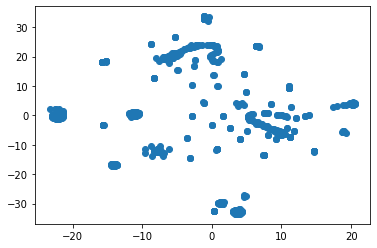

In [122]:
# create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X,y)
plt.show()

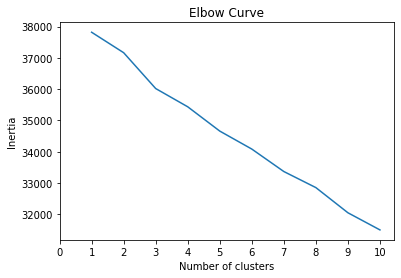

In [129]:
# Create an elbow plot to identify the best number of clusters. 
from sklearn.cluster import KMeans

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Analysis

Based on the scatter plot it might be possible to analyze some cryptocurrencies could be clustered together if there was better analysis done on the algorithms and they could somehow be generalized in some way similar to Proof Type. If there was a way to introduce some generality there the clusters may look better.

The Elbow curve is a different story. It's basically a straigth line. It's so straight, my first impression is that I did something wrong, but I checked our lessons on this and it appears correct ¯\_ (ツ)_/¯

I would consider a subset of these coins to cluster, like taking all Proof of Work or Proof of Stake together and see if the algorithms aligned a bit better. The high degree of variability in the features based on Proof Type and Algorithm make it difficult